In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import matplotlib as mpl
import random
import copy
from collections import defaultdict
from sklearn.metrics import roc_curve, roc_auc_score
warnings.filterwarnings(action = 'ignore')
plt.rcParams['font.family'] = 'KBIZmjo M'
%matplotlib inline

In [2]:
train = pd.read_csv('Desktop/데이터분석/titanic/train.csv')
test = pd.read_csv('Desktop/데이터분석/titanic/test.csv')

In [3]:
train.head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


In [4]:
test.head(7)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


----------------------------
# 데이터 타입 변환

In [7]:
#Name 칭호 분리 후 인덱스 부여 
train_set,test_set= set(),set()
for i,ind in zip(train['Name'], train.index):
    name_i = i.split(',')[1].split('.')[0].strip()
    train_set.add(name_i)
    train['Name'].iloc[ind:ind+1] =name_i
    
for i,ind in zip(test['Name'], test.index):
    name_i = i.split(',')[1].split('.')[0].strip()
    test_set.add(name_i)
    test['Name'].iloc[ind:ind+1] =name_i

In [8]:
train_set

{'Capt',
 'Col',
 'Don',
 'Dr',
 'Jonkheer',
 'Lady',
 'Major',
 'Master',
 'Miss',
 'Mlle',
 'Mme',
 'Mr',
 'Mrs',
 'Ms',
 'Rev',
 'Sir',
 'the Countess'}

In [9]:
test_set

{'Col', 'Dona', 'Dr', 'Master', 'Miss', 'Mr', 'Mrs', 'Ms', 'Rev'}

------------
Dona는 Mrs와 같고

Don은 Mr와 같다는데 같이 분류해야하나...?

In [10]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Mrs,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
train.Name.describe()

count     891
unique     17
top        Mr
freq      517
Name: Name, dtype: object

In [12]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,Mr,male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,Mrs,female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,Mr,male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,Mr,male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,Mrs,female,22.0,1,1,3101298,12.2875,NaN,S


In [13]:
test.Name.describe()

count     418
unique      9
top        Mr
freq      240
Name: Name, dtype: object

## 범주형 데이터 string -> int

In [14]:
object_col = ['Sex', 'Embarked','Name']
for c in object_col:
    train[c] = train[c].astype('category')
    test[c] = test[c].astype('category')
    
train['Sex'].cat.categories = [1,2]
test['Sex'].cat.categories = [1,2]
train['Embarked'].cat.categories = [1,2,3]
test['Embarked'].cat.categories = [1,2,3]
train['Name'].cat.categories = [i for i in range(1,len(train_set)+1)]
test['Name'].cat.categories= [i for i in range(1,len(test_set)+1)]

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null category
Sex            891 non-null category
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null category
dtypes: category(3), float64(2), int64(5), object(2)
memory usage: 66.3+ KB


In [16]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,12,2,22.0,1,0,A/5 21171,7.2500,NaN,3
1,2,1,1,13,1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,9,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,3
3,4,1,1,13,1,35.0,1,0,113803,53.1000,C123,3
4,5,0,3,12,2,35.0,0,0,373450,8.0500,NaN,3


In [17]:
train.info() #Ticket과 Cabin은 활용하지 않을 것같아서 일단 보류

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null category
Sex            891 non-null category
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null category
dtypes: category(3), float64(2), int64(5), object(2)
memory usage: 66.3+ KB


-----------------
# 나머지 결측치 처리(Age, Cabin 제외)

In [18]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## train의 Embarked  -  최빈값으로 채우기

In [20]:
train.Embarked.describe()

count     889
unique      3
top         3
freq      644
Name: Embarked, dtype: int64

In [21]:
train.Embarked.fillna(3, inplace = True)

In [22]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

## test의 Fare  -  mean으로 채우기

In [23]:
test.Fare.describe()

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

In [24]:
test.Fare.fillna(test.Fare.mean(), inplace = True)

In [25]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

------------------
# Age 결측치 처리

In [26]:
train.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

## 해당 행만 삭제


In [27]:
train_del = train.drop(train.loc[train.Age.isnull()].index) 
train_del.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,448.582633,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
std,259.119524,0.491460,0.838250,14.526497,0.929783,0.853289,52.918930
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.250000,0.000000,1.000000,20.125000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700
75%,677.750000,1.000000,3.000000,38.000000,1.000000,1.000000,33.375000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [28]:
train_del.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,448.582633,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
std,259.119524,0.491460,0.838250,14.526497,0.929783,0.853289,52.918930
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.250000,0.000000,1.000000,20.125000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700
75%,677.750000,1.000000,3.000000,38.000000,1.000000,1.000000,33.375000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


## mean

In [29]:
train_mean = copy.deepcopy(train)
train_mean['Age'].fillna(train_mean.Age.mean(), inplace = True)

In [30]:
train_mean.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [31]:
test_mean = copy.deepcopy(test)
test_mean['Age'].fillna(test_mean.Age.mean(), inplace = True)

## median

In [32]:
train_median = copy.deepcopy(train)
train_median['Age'].fillna(train_median.Age.median(), inplace = True)

In [33]:
train_median.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [34]:
test_median = copy.deepcopy(test)
test_median['Age'].fillna(test_median.Age.median(), inplace = True)

----------------------
# Cabin 결측치 처리

## 컬럼 삭제

In [35]:
train.drop('Cabin', axis= 1,inplace = True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null category
Sex            891 non-null category
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null category
dtypes: category(3), float64(2), int64(5), object(1)
memory usage: 59.3+ KB


In [36]:
train_del.drop('Cabin', axis= 1 , inplace = True)
train_mean.drop('Cabin', axis= 1 , inplace = True)
train_median.drop('Cabin', axis= 1 , inplace = True)

-----------------------
# 새로운 컬럼 추가

In [37]:
train['Family'] = train['SibSp'] + train['Parch']

In [38]:
train_mean['Family'] = train['SibSp'] + train['Parch']
train_median['Family'] = train['SibSp'] + train['Parch']
train_del['Family'] = train['SibSp'] + train['Parch']

test_mean['Family'] = test['SibSp'] + test['Parch']
test_median['Family'] = test['SibSp'] + test['Parch']



In [39]:
test['Family'] =  test['SibSp']+train['Parch']


In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null category
Sex            891 non-null category
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null category
Family         891 non-null int64
dtypes: category(3), float64(2), int64(6), object(1)
memory usage: 66.3+ KB


--------------------------------------
## 정리

- feature로 선택 가능한 것은, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Embarked


- Sex, Embarked는 [1,2], [1,2,3]으로 카테고리화


- Name은 칭호 분리 후 인덱싱


- Age 결측치 처리 방식에 따라 학습 데이터와 테스트 데이터 구분
    
    - del
    - mean
    - median


- 나머지 결측치는 양이 많지 않아서 모두 평균 또는 빈도수(범주형)가 많은 것으로 대체


- SibSp와 Parch를 더한 값인 Family 컬럼 추가

# 피처 선택

In [41]:
tmp_feature = ['Pclass', 'Age', 'Fare','SibSp','Parch','Family']

In [42]:
train[tmp_feature].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Pclass    891 non-null int64
Age       714 non-null float64
Fare      891 non-null float64
SibSp     891 non-null int64
Parch     891 non-null int64
Family    891 non-null int64
dtypes: float64(2), int64(4)
memory usage: 41.8 KB


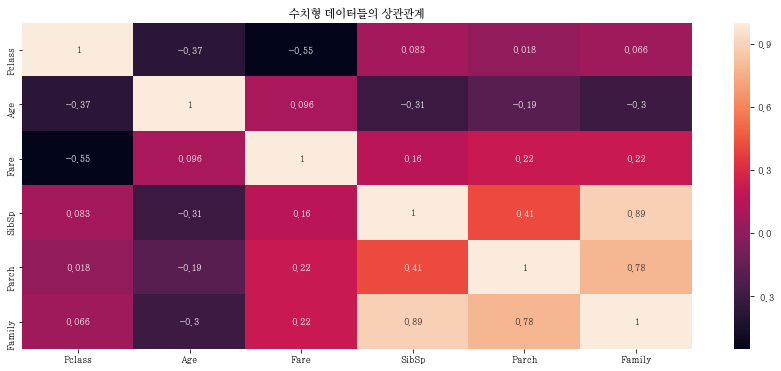

In [43]:
#표준화+상관관계분석
import scipy.stats as ss
plt.figure(figsize = (15,6))
plt.title('수치형 데이터들의 상관관계')
sns.heatmap(train[tmp_feature].corr(),annot = True)
plt.show()

-------------------
0.7 ~ 1.0 : 강한 양적 상관관계

0.3 ~ 0.7 : 뚜렷한 양적 상관관계

0.1 ~ 0.3 : 약한 양적 상관관계

-0.1 ~ 0.1 : 상관관계 거의 없음

-0.3 ~ -0.1 : 약한 음적 상관관계

-0.7 ~ -0.3 : 뚜렷한 음적 상관관계

-1.0 ~ -0.7 : 강한 음적 상관관계


위 기준에 따르면, 

Pclass와 Age -> 뚜렷한 음적 상관관계

Fare와 Pclass -> 뚜렷한 음적 상관관계

SibSp와 Parch -> 뚜렷한 양적 상관관계

SibSp와 Age -> 뚜렷한 음적 상관관계

Family와 Age -> 뚜렷한 음적 상관관계

Family와 SibSp,Parch -> 강한 양적 상관관계

로 해석할 수 있을 것 같다. 



<br><br>
*train_mean 또는 train_median에 적용하면 상관관계가 더 낮아짐*

## SibSp, Parch -> Family로 대체

Family와 SibSp, Parch는 강한 양적 상관관계를 보이고 다른 컬럼들과 상관관계도 큰 차이가 없으므로

SibSp,Parch를 Family로 대체해도 된다고 생각한다.


In [44]:
train.drop(['SibSp', 'Parch'], axis = 1, inplace = True)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Family
0,1,0,3,12,2,22.0,A/5 21171,7.2500,3,1
1,2,1,1,13,1,38.0,PC 17599,71.2833,1,1
2,3,1,3,9,1,26.0,STON/O2. 3101282,7.9250,3,0
3,4,1,1,13,1,35.0,113803,53.1000,3,1
4,5,0,3,12,2,35.0,373450,8.0500,3,0


In [45]:
train_del.drop(['SibSp', 'Parch'],axis = 1, inplace = True)
train_mean.drop(['SibSp', 'Parch'],axis = 1, inplace = True)
train_median.drop(['SibSp', 'Parch'],axis = 1, inplace = True)

In [46]:
train_mean.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Family
0,1,0,3,12,2,22.0,A/5 21171,7.2500,3,1
1,2,1,1,13,1,38.0,PC 17599,71.2833,1,1
2,3,1,3,9,1,26.0,STON/O2. 3101282,7.9250,3,0
3,4,1,1,13,1,35.0,113803,53.1000,3,1
4,5,0,3,12,2,35.0,373450,8.0500,3,0


In [47]:
#피처 선택
feature = ['Pclass','Name', 'Sex', 'Age','Family']
feature_no_age = ['Pclass','Name', 'Sex', 'Family']

# 모델 적용 및 평가

## Recall  vs  Precision

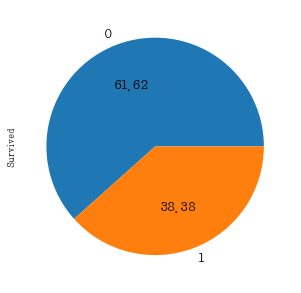

In [48]:
train.Survived.value_counts().plot.pie(figsize = (5,5),autopct = '%.2f',fontsize=15)
plt.show()

---------------------
train데이터는 사망자(False)가 61.62%를 차지하므로,

False Negatives 즉, 생존자를 사망자로 분류하는 것을 줄여야한다.

따라서 <strong>Recall이 더 중요한 평가지표</strong>이다.

<br><br>
## PR곡선 vs ROC곡선

In [49]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Ticket',
       'Fare', 'Embarked', 'Family'],
      dtype='object')

In [118]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve

#model 적용 및 평가
def model_result(feature, x, model):
    x_train, x_test, y_train, y_test = train_test_split(x[feature], x['Survived'], test_size = 0.3)
    model.fit(x_train, y_train)
    print(confusion_matrix(model.predict(x_test), y_test),'\n\n')
    print(classification_report(model.predict(x_test), y_test))
    y_pred_proba = model.predict_proba(x_test)[::,1]
    #ROC곡선과 AUC
    fp,tp, thres = roc_curve(y_test,y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    print('\nAUC=',auc)
    plt.plot(fp,tp)
    plt.ylabel('TPR')
    plt.xlabel('FPR')
#     #PR곡선
#     precision,recall,thres = precision_recall_curve(y_test,y_pred_proba)
#     tmp_n =min(precision.shape[0], recall.shape[0], thres.shape[0])
#     plt.plot(thres, precision[:tmp_n], "b--", label='precision')
#     plt.plot(thres, recall[:tmp_n], "g-", label='recall')
#     plt.ylim([0, 1])
#     plt.xlabel("threshold")
#     plt.legend()
    plt.show()

In [51]:
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression()

[[122  18]
 [ 15  60]] 


              precision    recall  f1-score   support

           0       0.89      0.87      0.88       140
           1       0.77      0.80      0.78        75

   micro avg       0.85      0.85      0.85       215
   macro avg       0.83      0.84      0.83       215
weighted avg       0.85      0.85      0.85       215


AUC= 0.9042672655811342


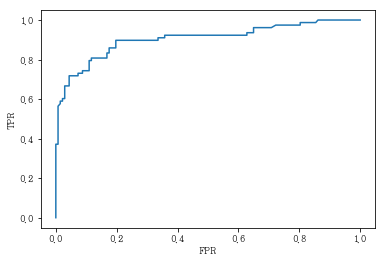

In [52]:
model_result(feature, train_del, log_clf)

[[144  35]
 [ 20  69]] 


              precision    recall  f1-score   support

           0       0.88      0.80      0.84       179
           1       0.66      0.78      0.72        89

   micro avg       0.79      0.79      0.79       268
   macro avg       0.77      0.79      0.78       268
weighted avg       0.81      0.79      0.80       268


AUC= 0.8531601782363978


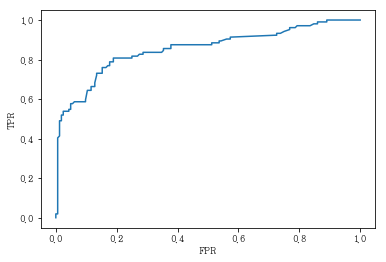

In [53]:
model_result(feature,train_median, log_clf)

[[146  44]
 [ 12  66]] 


              precision    recall  f1-score   support

           0       0.92      0.77      0.84       190
           1       0.60      0.85      0.70        78

   micro avg       0.79      0.79      0.79       268
   macro avg       0.76      0.81      0.77       268
weighted avg       0.83      0.79      0.80       268


AUC= 0.8451956271576525


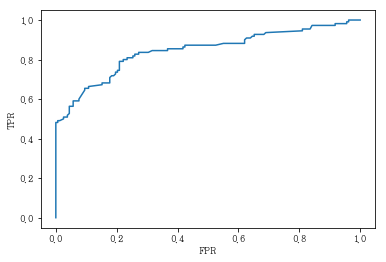

In [54]:
model_result(feature,train_mean, log_clf)

In [55]:
from sklearn.naive_bayes import MultinomialNB
nb_clf = MultinomialNB()

[[106  89]
 [ 10  10]] 


              precision    recall  f1-score   support

           0       0.91      0.54      0.68       195
           1       0.10      0.50      0.17        20

   micro avg       0.54      0.54      0.54       215
   macro avg       0.51      0.52      0.42       215
weighted avg       0.84      0.54      0.63       215


AUC= 0.6986241727621039


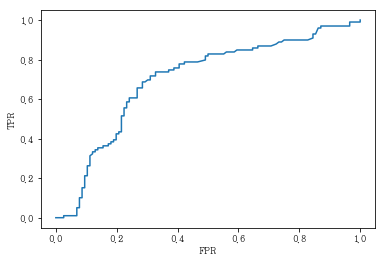

In [56]:
model_result(feature,train_del, nb_clf)

[[166  81]
 [  9  12]] 


              precision    recall  f1-score   support

           0       0.95      0.67      0.79       247
           1       0.13      0.57      0.21        21

   micro avg       0.66      0.66      0.66       268
   macro avg       0.54      0.62      0.50       268
weighted avg       0.88      0.66      0.74       268


AUC= 0.7501382488479262


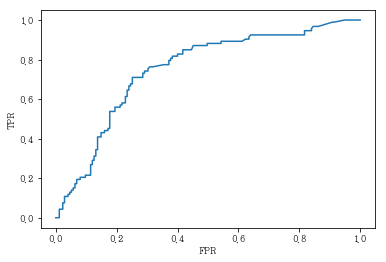

In [57]:
model_result(feature,train_median, nb_clf)

[[139  73]
 [ 33  23]] 


              precision    recall  f1-score   support

           0       0.81      0.66      0.72       212
           1       0.24      0.41      0.30        56

   micro avg       0.60      0.60      0.60       268
   macro avg       0.52      0.53      0.51       268
weighted avg       0.69      0.60      0.64       268


AUC= 0.575672238372093


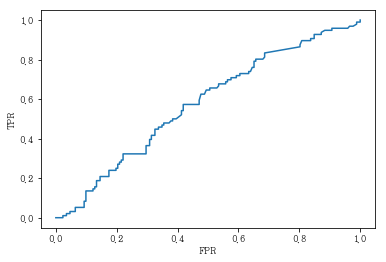

In [58]:
model_result(feature,train_mean, nb_clf)

-----------
위 나이브베이즈 모델은 Recall, AUC값을 보았을 때 성능이 좋지 않은것으로 보인다.

In [59]:
from sklearn import svm
svm_clf = svm.SVC(probability = True)

[[107  30]
 [ 15  63]] 


              precision    recall  f1-score   support

           0       0.88      0.78      0.83       137
           1       0.68      0.81      0.74        78

   micro avg       0.79      0.79      0.79       215
   macro avg       0.78      0.79      0.78       215
weighted avg       0.80      0.79      0.79       215


AUC= 0.8686761854398025


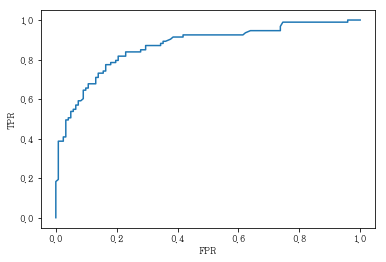

In [60]:
model_result(feature,train_del, svm_clf)

[[152  34]
 [ 18  64]] 


              precision    recall  f1-score   support

           0       0.89      0.82      0.85       186
           1       0.65      0.78      0.71        82

   micro avg       0.81      0.81      0.81       268
   macro avg       0.77      0.80      0.78       268
weighted avg       0.82      0.81      0.81       268


AUC= 0.861014405762305


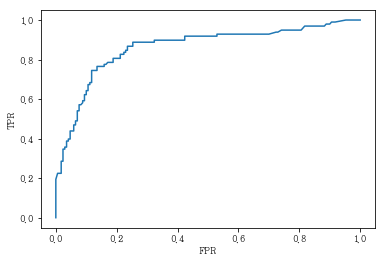

In [61]:
model_result(feature,train_median, svm_clf)

[[144  45]
 [ 18  61]] 


              precision    recall  f1-score   support

           0       0.89      0.76      0.82       189
           1       0.58      0.77      0.66        79

   micro avg       0.76      0.76      0.76       268
   macro avg       0.73      0.77      0.74       268
weighted avg       0.80      0.76      0.77       268


AUC= 0.8214535290006987


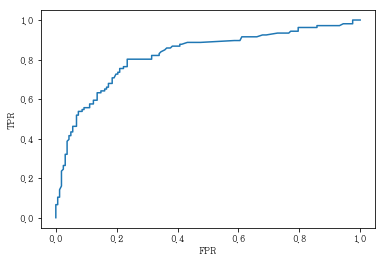

In [62]:
model_result(feature,train_mean, svm_clf)

In [63]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()

[[113  22]
 [ 21  59]] 


              precision    recall  f1-score   support

           0       0.84      0.84      0.84       135
           1       0.73      0.74      0.73        80

   micro avg       0.80      0.80      0.80       215
   macro avg       0.79      0.79      0.79       215
weighted avg       0.80      0.80      0.80       215


AUC= 0.7958356366316566


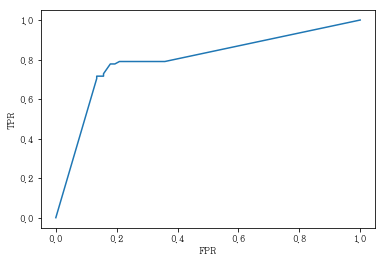

In [64]:
model_result(feature,train_del, dt_clf)

[[139  33]
 [ 26  70]] 


              precision    recall  f1-score   support

           0       0.84      0.81      0.82       172
           1       0.68      0.73      0.70        96

   micro avg       0.78      0.78      0.78       268
   macro avg       0.76      0.77      0.76       268
weighted avg       0.78      0.78      0.78       268


AUC= 0.7719917622830244


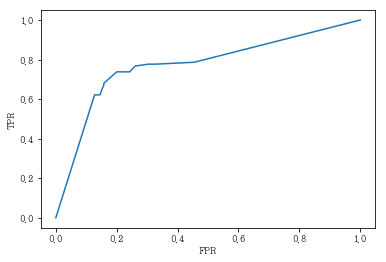

In [65]:
model_result(feature,train_median, dt_clf)

[[147  32]
 [ 24  65]] 


              precision    recall  f1-score   support

           0       0.86      0.82      0.84       179
           1       0.67      0.73      0.70        89

   micro avg       0.79      0.79      0.79       268
   macro avg       0.76      0.78      0.77       268
weighted avg       0.80      0.79      0.79       268


AUC= 0.7741906312172182


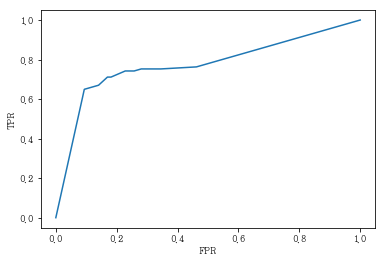

In [66]:
model_result(feature,train_mean, dt_clf)

In [67]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()

[[93 19]
 [30 73]] 


              precision    recall  f1-score   support

           0       0.76      0.83      0.79       112
           1       0.79      0.71      0.75       103

   micro avg       0.77      0.77      0.77       215
   macro avg       0.77      0.77      0.77       215
weighted avg       0.77      0.77      0.77       215


AUC= 0.8307705903145989


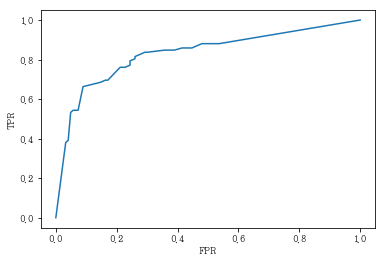

In [68]:
model_result(feature,train_del, rf_clf)

[[144  34]
 [ 26  64]] 


              precision    recall  f1-score   support

           0       0.85      0.81      0.83       178
           1       0.65      0.71      0.68        90

   micro avg       0.78      0.78      0.78       268
   macro avg       0.75      0.76      0.75       268
weighted avg       0.78      0.78      0.78       268


AUC= 0.812094837935174


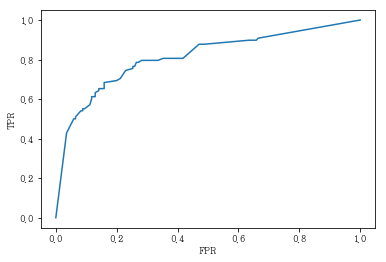

In [69]:
model_result(feature,train_median, rf_clf)

[[142  29]
 [ 26  71]] 


              precision    recall  f1-score   support

           0       0.85      0.83      0.84       171
           1       0.71      0.73      0.72        97

   micro avg       0.79      0.79      0.79       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.80      0.79      0.80       268


AUC= 0.815


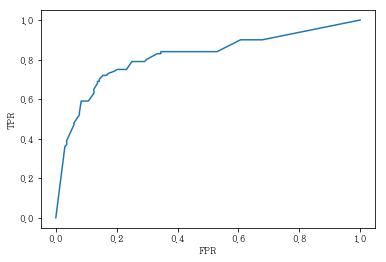

In [70]:
model_result(feature,train_mean, rf_clf)

In [71]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier()

[[117  31]
 [ 11  56]] 


              precision    recall  f1-score   support

           0       0.91      0.79      0.85       148
           1       0.64      0.84      0.73        67

   micro avg       0.80      0.80      0.80       215
   macro avg       0.78      0.81      0.79       215
weighted avg       0.83      0.80      0.81       215


AUC= 0.8316720545977011


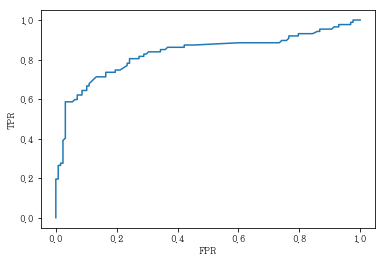

In [72]:
model_result(feature,train_del, gb_clf)

[[145  22]
 [ 28  73]] 


              precision    recall  f1-score   support

           0       0.84      0.87      0.85       167
           1       0.77      0.72      0.74       101

   micro avg       0.81      0.81      0.81       268
   macro avg       0.80      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268


AUC= 0.8657438393672041


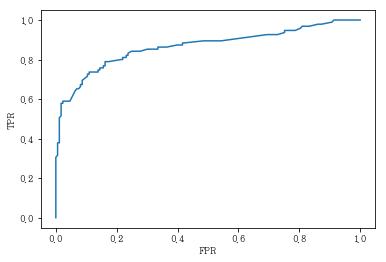

In [73]:
model_result(feature,train_median, gb_clf)

[[145  30]
 [ 25  68]] 


              precision    recall  f1-score   support

           0       0.85      0.83      0.84       175
           1       0.69      0.73      0.71        93

   micro avg       0.79      0.79      0.79       268
   macro avg       0.77      0.78      0.78       268
weighted avg       0.80      0.79      0.80       268


AUC= 0.8479891956782715


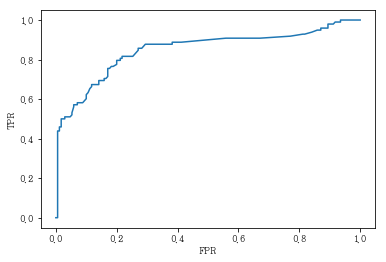

In [74]:
model_result(feature,train_mean, gb_clf)

# 최종 결과

In [75]:
feature

['Pclass', 'Name', 'Sex', 'Age', 'Family']

In [76]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null category
Sex            891 non-null category
Age            714 non-null float64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null category
Family         891 non-null int64
dtypes: category(3), float64(2), int64(4), object(1)
memory usage: 52.4+ KB


In [114]:
#Survived, Ticket, PassengerId를 제외한 모든 컬럼 포함
feature_all= ['Pclass','Name', 'Sex','Age','Fare','Embarked','Family']
#feature를 적게 
feature_min = ['Sex', 'Age','Fare','Family']

In [91]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null category
Sex            418 non-null category
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          91 non-null object
Embarked       418 non-null category
Family         418 non-null float64
dtypes: category(3), float64(3), int64(4), object(2)
memory usage: 31.3+ KB


In [207]:
model = rf_clf
x_train = train_mean[feature_min]
model.fit(x_train, train_mean['Survived'])
y_test = model.predict(test_mean[feature_min])

In [208]:
submission = pd.read_csv('Desktop/데이터분석/titanic/gender_submission.csv')
submission['Survived']= y_test
submission.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0


In [117]:
submission.to_csv('Desktop/데이터분석/titanic/submission_rf_mean_feature_min.csv',index =  False)

-----------
<각 모델별 최고 조합 및 점수>
- Gradient Boost : train_del, feature_no_age (0.775)
- Random Forest : train_mean, test_mean,feature_all (0.751)
- Logistic Regression : All (0.770)
- Decision Tree : train_median, train_mean (0.761)
- SVM, Naive Bayes : 모두 0.7 미만

-----------------------------
Random Forest는 feature의 선택과 데이터 전처리 방식에 따라 결과값이 크게 달라진다.

예를 들어, 

train_del[feature_all]로 학습하고 test_mean[feature_all]에 적용하는 것은 0.708

train_del[feature_all]로 학습하고 test_median[feature_all]에 적용하는 것은 0.584

train_median[feature_all]로 학습하고 test_median[feature_all]에 적용하는 것은 0.641

train_mean[feature_no_age]로 학습하고 test[feature_no_age]에 적용하는 것은 0.737

train_mean[feature_min]로 학습하고 test_mean[feature_min]에 적용하는 것은 0.742

반면에,

Logistic Regression은 feature_no_age, feature, feature_all 중 어떠한 것을 적용해도, 어떠한 전처리 방식을 적용해도 결과값은 0.770이다.

In [119]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [227]:
log_score= cross_val_score(log_clf, train_median[feature],train_median['Survived'], cv=10).mean()
rf_score = cross_val_score(rf_clf, train_median[feature], train_median['Survived'], cv=10).mean()

print("Logistic Regression = {0:.6f}".format(log_score))
print("Random Forest = {0:.6f}".format(rf_score))

Logistic Regression = 0.799109
Random Forest = 0.811443


----------------------
교차 검증에서도 Logistic Regression은 cv값이 같다면 항상 같은 값을 보이고, 

Random Forest는 같은 cv값이어도 계속 다른 값을 보인다.

## 왜 이런 결과가?
<strong>Random Forest</strong>는

Feature의 수, 질문의 순서를 랜덤하게 조절하여 의사결정트리를 만들고,

 

모든 트리의 결과값의 최빈값 또는 평균값으로 최종 결과값을 도출하기 때문에 <strong>같은 데이터 전처리 방식 + 같은 feature</strong>를 선택해도 결과값이 다르게 나온다. 

 

따라서 <strong>다른 데이터 전처리 방식 + 다른 feature</strong>를 선택하면 결과값이 더욱 크게 달라지는 것 같다.

<br><br>

그럼 <strong>Logistic Regression</strong>은?

 
<br>
우선, Logistic Regession의 원리를 간단하게 설명하자면,

 

1. 모든 데이터를 활용한다.

 <br>

2. 확률로 분류한다. 

    ex)

    P(Y=1) >= 0.5 이면 1로 분류

    P(Y=1) < 0.5이면 0으로 분류

<br>

3. 각 feature에 가중치가 부여된다. (회귀계수)

 
<br>

Random Forest와의 큰 차이점은, 

 

<strong>Random Forest의 '질문의 순서'와 Logistic Regression의 '가중치'</strong>라고 생각한다. 

 

Random Forest같은 경우는 <strong>질문의 순서가 빠를 수록</strong>  해당 feature는 영향력이 크게 작용되고,

 

Logistic Regression은 <strong>가중치가 큰</strong> feature가 영향력이 크다.

<br><br>
 
그래서 내가 생각하기엔 아래 두 가지의 이유가 있다고 생각한다. 
<br>
 

1. <strong>'Age'결측치를 어떻게 처리하든 큰 차이가 없으므로</strong> train_del, train_mean, train_median 중 어떤 것을 적용해도 결과가 달라질 정도로 확률이 변하지 않는다. 


2. <strong>'Age'의 가중치가 크지 않아</strong> 'Age'를 feature로 선택하든 안하든 결과에 큰 영향을 미치지 않는다.
